In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import matplotlib.image as mpimg

In [36]:
miami_housing = pd.read_csv('/Users/zahidlaguna/Downloads/miami-housing.csv', usecols= ['LATITUDE', 'LONGITUDE', 'SALE_PRC'])
miami_housing.head(10)

,LATITUDE,LONGITUDE,SALE_PRC
0,25.891031,-80.160561,440000.0
1,25.891324,-80.153968,349000.0
2,25.891334,-80.153740,800000.0
3,25.891765,-80.152657,988000.0
4,25.891825,-80.154639,755000.0
5,25.892060,-80.161354,630000.0
6,25.892473,-80.157217,1020000.0
7,25.893019,-80.157426,850000.0
8,25.893046,-80.161556,250000.0
9,25.893050,-80.158048,1220000.0


In [37]:
miami_housing.shape

(13932, 3)

In [38]:
miami_housing.describe()

,LATITUDE,LONGITUDE,SALE_PRC
count,13932.000000,13932.000000,1.393200e+04
mean,25.728811,-80.327475,3.999419e+05
std,0.140633,0.089199,3.172147e+05
min,25.434333,-80.542172,7.200000e+04
25%,25.620056,-80.403278,2.350000e+05
50%,25.731810,-80.338911,3.100000e+05
75%,25.852269,-80.258019,4.280000e+05
max,25.974382,-80.119746,2.650000e+06


In [39]:
miami_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   13932 non-null  float64
 1   LONGITUDE  13932 non-null  float64
 2   SALE_PRC   13932 non-null  float64
dtypes: float64(3)
memory usage: 326.7 KB


In [40]:
miami_housing.isnull().sum()

LATITUDE     0
LONGITUDE    0
SALE_PRC     0
dtype: int64

In [41]:
scaler = StandardScaler()
print(scaler.fit(miami_housing))

StandardScaler()


In [42]:
print(scaler.transform(miami_housing))

[[ 1.15353197  1.87132775  0.12628516]
 [ 1.15561993  1.94524374 -0.16059711]
 [ 1.15569043  1.94780015  1.261204  ]
 ...
 [ 0.39097318  0.79992192 -0.35447907]
 [ 0.39249105  0.78403869 -0.26778388]
 [ 0.39519527  0.7688056  -0.47269979]]


<AxesSubplot: xlabel='LONGITUDE', ylabel='LATITUDE'>

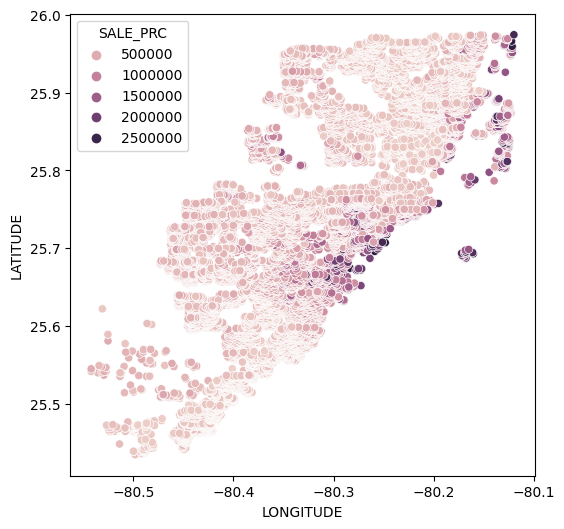

In [43]:
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data= miami_housing, x = 'LONGITUDE', y = 'LATITUDE', hue = 'SALE_PRC')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(miami_housing[['LONGITUDE', 'LATITUDE']], miami_housing[['SALE_PRC']], test_size=0.3, random_state=0)
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

<AxesSubplot: xlabel='LONGITUDE', ylabel='LATITUDE'>

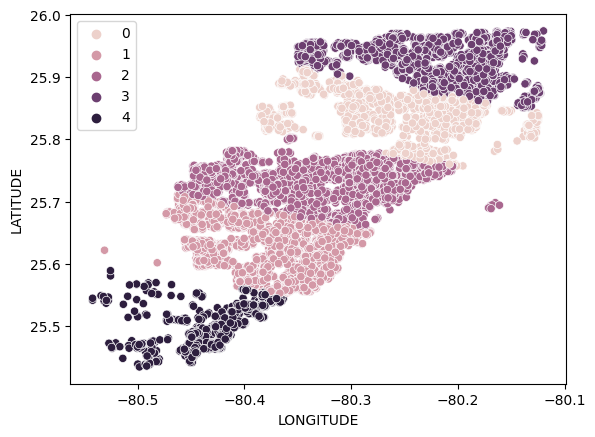

In [45]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)
sns.scatterplot(data = X_train, x = 'LONGITUDE', y = 'LATITUDE', hue = kmeans.labels_)

<AxesSubplot: ylabel='SALE_PRC'>

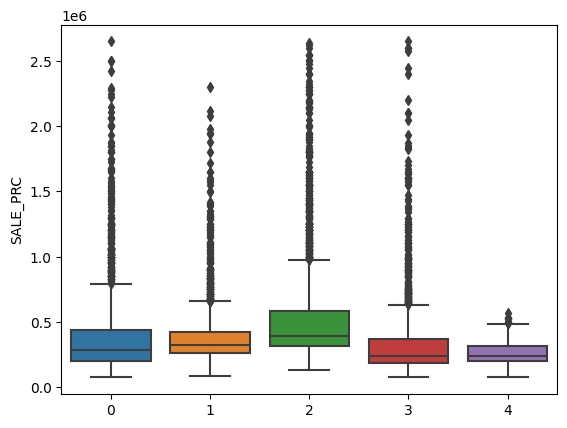

In [46]:
sns.boxplot(x = kmeans.labels_, y = y_train['SALE_PRC'])

In [47]:
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.5713548286746787

In [48]:
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    fits.append(model)
    score.append(silhouette_score(X_train_norm, model.labels_, metric='haversine'))

<AxesSubplot: xlabel='LONGITUDE', ylabel='LATITUDE'>

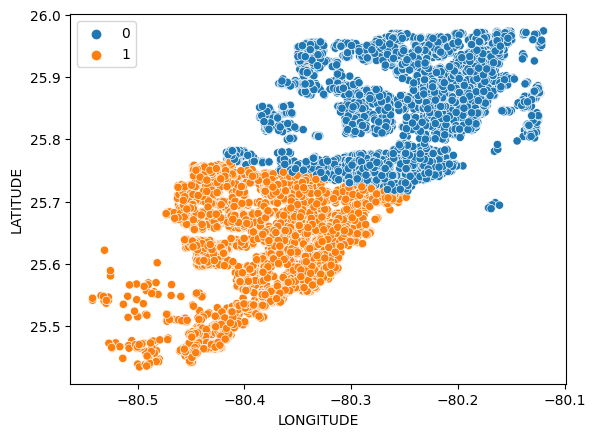

In [49]:
sns.scatterplot(data = X_train, x = 'LONGITUDE', y = 'LATITUDE', hue = fits[0].labels_)

<AxesSubplot: xlabel='LONGITUDE', ylabel='LATITUDE'>

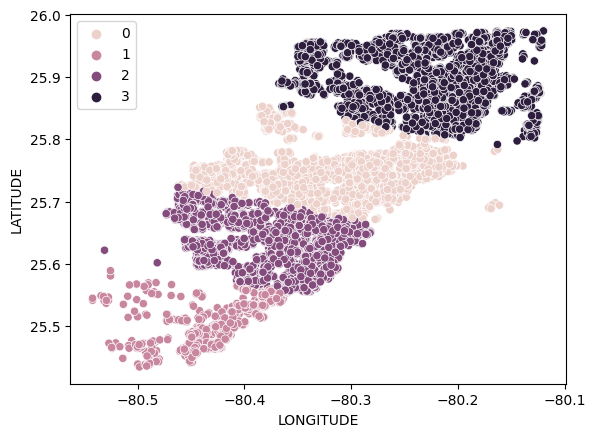

In [50]:
sns.scatterplot(data = X_train, x = 'LONGITUDE', y = 'LATITUDE', hue = fits[2].labels_)

<AxesSubplot: xlabel='LONGITUDE', ylabel='LATITUDE'>

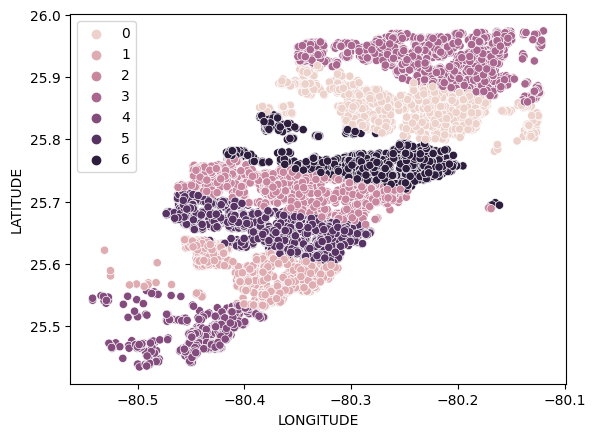

In [51]:
sns.scatterplot(data = X_train, x = 'LONGITUDE', y = 'LATITUDE', hue = fits[5].labels_)

<AxesSubplot: >

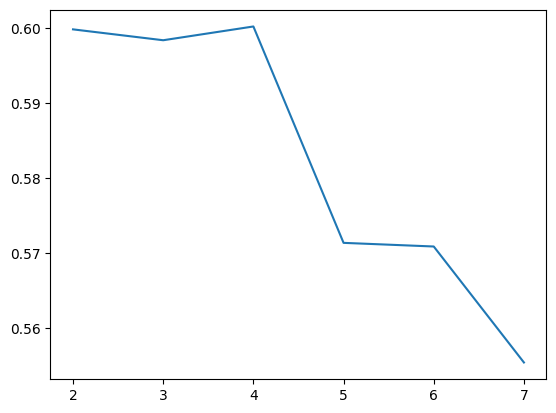

In [52]:
sns.lineplot(x = K, y = score)

<AxesSubplot: ylabel='SALE_PRC'>

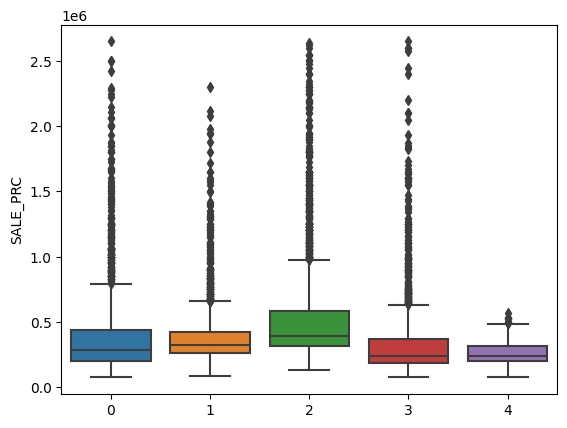

In [53]:
sns.boxplot(x = fits[3].labels_, y = y_train['SALE_PRC'])

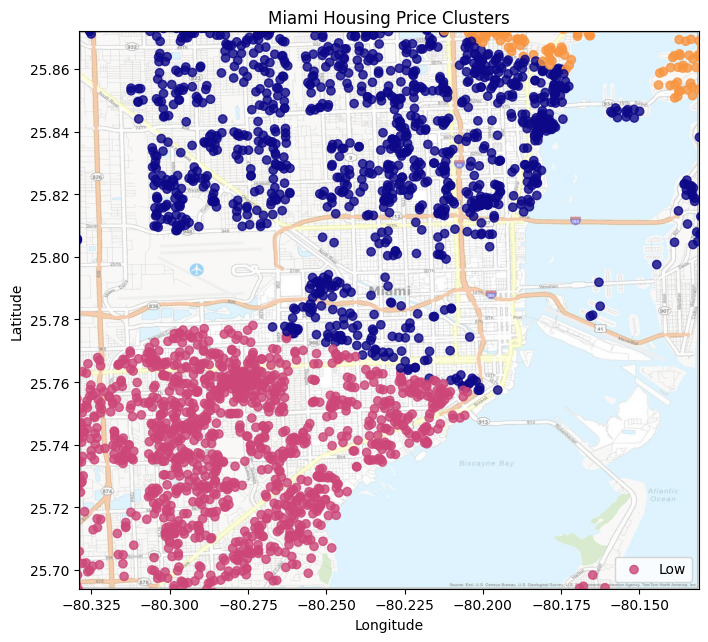

In [61]:
miami = mpimg.imread('/Users/zahidlaguna/Downloads/Miami.png')
img_height, img_width = miami.shape[:2]
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train['LONGITUDE'], X_train['LATITUDE'], c = fits[3].labels_, cmap = 'plasma', alpha = 0.8)
ax.imshow(miami, extent = [-80.329, -80.131, 25.694, 25.872], alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Miami Housing Price Clusters')
labels = ['Low', 'Medium', 'High'] 
plt.legend(labels)
plt.show()